In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Discontinuities

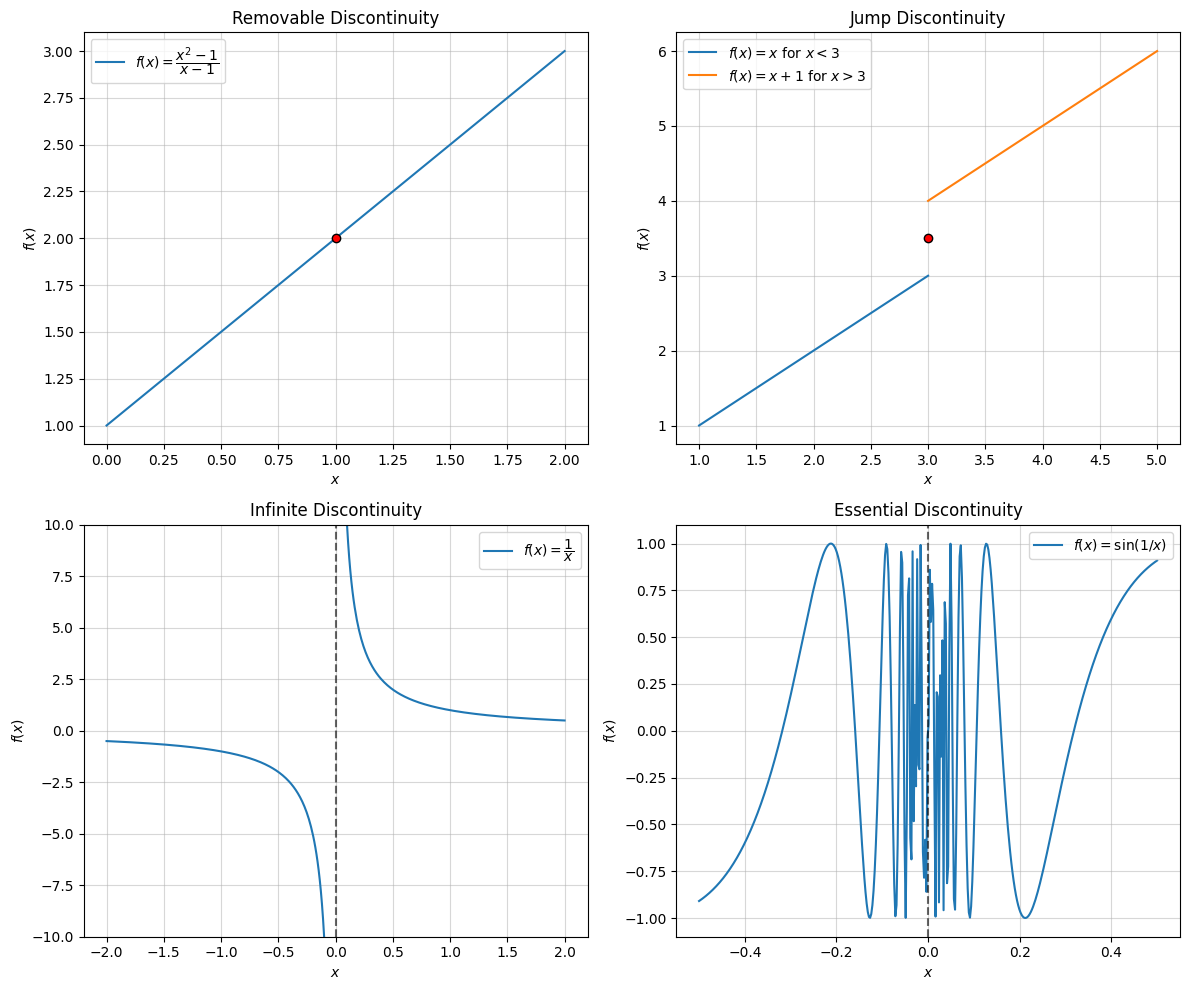

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define x values for each function
x1 = np.linspace(0, 2, 200)
x2_left = np.linspace(1, 3, 200)  # Left side of the jump discontinuity (x < 3)
x2_right = np.linspace(3, 5, 200)  # Right side (x > 3)
x3_left = np.linspace(-2, -0.1, 200)  # Left side of the infinite discontinuity (x < 0)
x3_right = np.linspace(0.1, 2, 200)  # Right side (x > 0)
x4 = np.linspace(-0.5, 0.5, 400)

# Removable discontinuity function f(x) = (x^2 - 1) / (x - 1)
y1 = (x1**2 - 1) / (x1 - 1)
y1[np.isclose(x1, 1)] = np.nan  # Remove point at x = 1

axes[0, 0].plot(x1, y1, label=r"$f(x) = \dfrac{x^2 - 1}{x - 1}$")
axes[0, 0].scatter(1, 2, color='red', edgecolors='black', zorder=3)  # Hole at (1,2)
axes[0, 0].set_title("Removable Discontinuity")

# Jump discontinuity function 
y2_left = x2_left  # Function for x < 3
y2_right = x2_right + 1  # Function for x > 3

axes[0, 1].plot(x2_left, y2_left, label=r"$f(x) = x$ for $x<3$")
axes[0, 1].plot(x2_right, y2_right, label=r"$f(x) = x+1$ for $x>3$", linestyle="-")
axes[0, 1].scatter(3, 3.5, color='red', edgecolors='black', zorder=3)  # Isolated point at x = 3
axes[0, 1].set_title("Jump Discontinuity")

# Infinite discontinuity (pole) function f(x) = 1/x, split into left and right of x=0
y3_left = 1 / x3_left
y3_right = 1 / x3_right

axes[1, 0].plot(x3_left, y3_left, label=r"$f(x) = \dfrac{1}{x}$", color="C0")
axes[1, 0].plot(x3_right, y3_right, color="C0")  # No vertical line at x = 0
axes[1, 0].set_ylim(-10, 10)
axes[1, 0].axvline(0, color="k", linestyle="--", alpha=0.6)
axes[1, 0].set_title("Infinite Discontinuity")

# Essential discontinuity function f(x) = sin(1/x)
y4 = np.sin(1 / x4)
y4[np.isclose(x4, 0)] = np.nan  # Remove point at x = 0

axes[1, 1].plot(x4, y4, label=r"$f(x) = \sin(1/x)$")
axes[1, 1].set_title("Essential Discontinuity")
axes[1, 1].axvline(0, color="k", linestyle="--", alpha=0.6)

# Formatting all plots
for ax in axes.flat:
    ax.legend()
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('figures/discontinuities.pdf')

Lipschitz Continuity

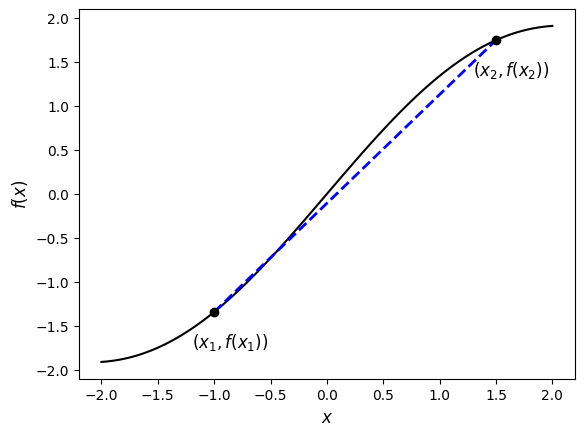

In [4]:
# Define a Lipschitz continuous function 
def f(x):
    return np.sin(x) + 0.5*x

# Define two points x1 and x2
x1, x2 = -1, 1.5
y1, y2 = f(x1), f(x2)

# Compute the Lipschitz constant (approximate using the secant slope)
L_approx = abs((y2 - y1) / (x2 - x1))

# Generate x values for plotting
x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

# Compute the upper bound line using the Lipschitz condition
def upper_bound_line(x_tangent):
    return y1 + L_approx * abs(x_tangent - x1)

# Generate the upper bound values
y_upper_bound = upper_bound_line(x_vals)

fig, ax = plt.subplots()

# Plot the function
ax.plot(x_vals, y_vals, 'k', label='$f(x)$')

# Plot the secant line between (x1, f(x1)) and (x2, f(x2))
ax.plot([x1, x2], [y1, y2], 'b--', linewidth=2, label=r'$|f(x_1) - f(x_2)| \leq L |x_1 - x_2|$')

# Plot the points
ax.scatter([x1, x2], [y1, y2], color='black', zorder=3)
ax.text(x1 - 0.2, y1 - 0.4, r'$(x_1, f(x_1))$', fontsize=12)
ax.text(x2 - 0.2, y2 - 0.4, r'$(x_2, f(x_2))$', fontsize=12)

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$f(x)$', fontsize=12)

# Show the plot
plt.savefig('figures/lipschitz_continuity.pdf')